In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
def save_plot(filename, dpi=300, format='png', folder='plots'):
    if not os.path.exists(folder):
        os.makedirs(folder)

    filepath = os.path.join(folder, f"{filename}.{format}")
    plt.savefig(filepath, dpi=dpi, bbox_inches='tight', format=format)
    print(f"Plot saved as {filepath}")
    plt.show()

In [3]:
df = pd.read_csv('VowelA_High_latest.csv')

In [4]:
df.head()

,Unnamed: 0,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,ID,G,A
0,0,1-a_h.wav,0.127341,0.355538,1587.507015,2002.198851,2737.971816,0.066798,-233.566208,48.504421,...,-28.190628,1.143172,4.134034,52.794827,39.092403,49.037060,Healthy,1,w,20
1,1,10-a_h.wav,0.215317,0.250342,1272.900724,1850.302841,1692.919922,0.043325,-179.419601,119.705742,...,7.790230,-7.037875,-9.193601,11.183559,-2.173607,-9.420938,Healthy,10,w,22
2,2,100-a_h.wav,0.212512,0.251419,919.203795,1014.718104,1275.967478,0.047079,-209.186188,167.135651,...,-20.040691,-4.153456,-2.725145,-10.669723,-2.336876,7.741264,Healthy,100,m,66
3,3,1000-a_h.wav,0.198861,0.157396,1119.517351,1529.490600,1501.657586,0.045487,-210.244278,139.819519,...,-0.163550,7.797343,-26.314997,-6.622046,0.535120,0.749695,Healthy,1000,m,31
4,4,1002-a_h.wav,0.370113,0.143538,1060.678054,1346.299507,1524.942294,0.050109,-175.039948,181.905212,...,-20.939833,13.306650,-26.597456,-8.324528,10.786009,-6.677513,Healthy,1002,m,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2035 non-null   int64  
 1   filename            2035 non-null   object 
 2   chroma_stft         2035 non-null   float64
 3   rmse                2035 non-null   float64
 4   spectral_centroid   2035 non-null   float64
 5   spectral_bandwidth  2035 non-null   float64
 6   rolloff             2035 non-null   float64
 7   zero_crossing_rate  2035 non-null   float64
 8   mfcc1               2035 non-null   float64
 9   mfcc2               2035 non-null   float64
 10  mfcc3               2035 non-null   float64
 11  mfcc4               2035 non-null   float64
 12  mfcc5               2035 non-null   float64
 13  mfcc6               2035 non-null   float64
 14  mfcc7               2035 non-null   float64
 15  mfcc8               2035 non-null   float64
 16  mfcc9 

In [6]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop(columns=['Unnamed: 0', 'filename', 'ID'])

df_cleaned['G'] = df_cleaned['G'].replace({
    'm' : 'male', 
    'w' : 'female'
    })
df_cleaned = df_cleaned.rename(columns={
    'G': 'gender', 
    'A': 'age', 
    'label': 'health_status'
})

Age - Mean: 42.7, Std: 18.1, 25th: 24.0, 50th: 42.0, 75th: 59.0
Plot saved as plots/age_distribution.png


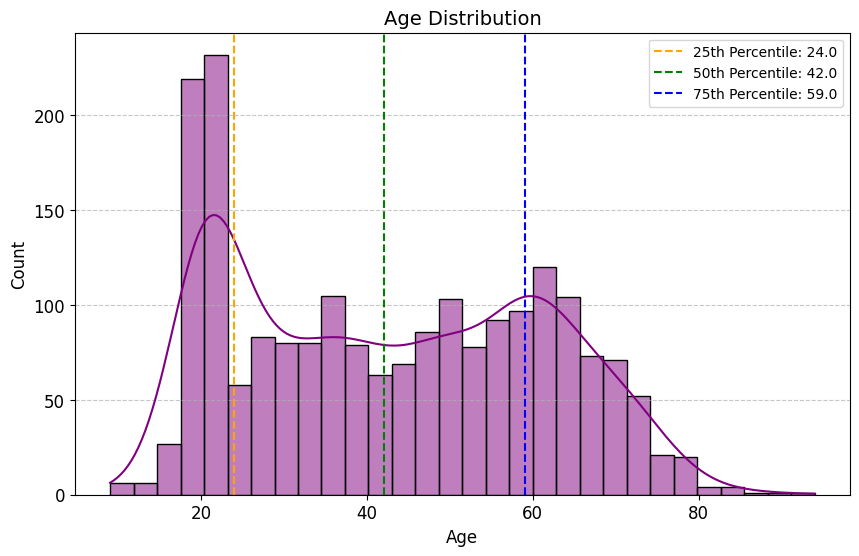

In [7]:
age_mean = np.round(df_cleaned['age'].mean(), 1)
age_std = np.round(df_cleaned['age'].std(), 1)
age_percentiles = np.percentile(df_cleaned['age'], [25, 50, 75])
print(f"Age - Mean: {age_mean}, Std: {age_std}, 25th: {age_percentiles[0]}, 50th: {age_percentiles[1]}, 75th: {age_percentiles[2]}")
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='age', bins=30, color='purple', kde=True)
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(age_percentiles[0], color='orange', linestyle='--', label=f'25th Percentile: {age_percentiles[0]}')
plt.axvline(age_percentiles[1], color='green', linestyle='--', label=f'50th Percentile: {age_percentiles[1]}')
plt.axvline(age_percentiles[2], color='blue', linestyle='--', label=f'75th Percentile: {age_percentiles[2]}')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
save_plot('age_distribution')

Plot saved as plots/age_distribution_by_health_status.png


/var/folders/_1/_qs6rq1s5l5c7t2_v39s6scw0000gn/T/ipykernel_7494/2299878163.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


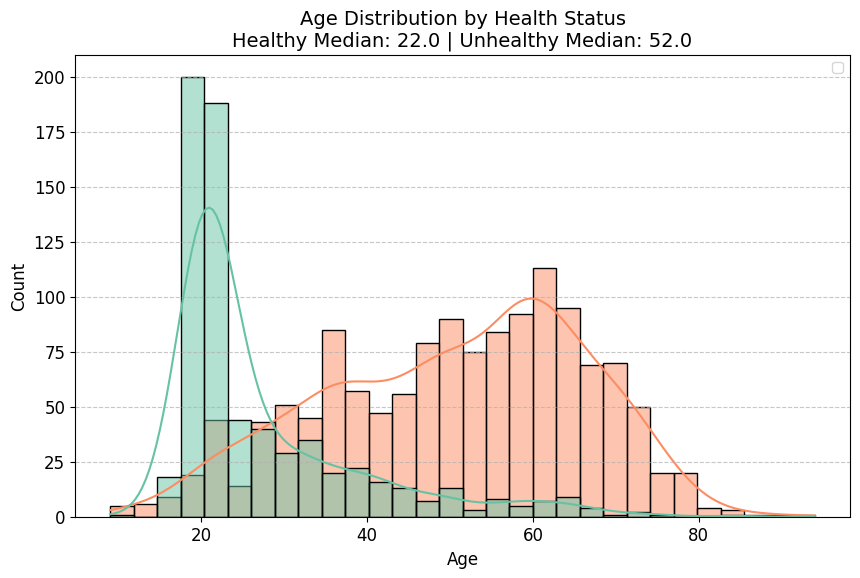

In [8]:
healthy_mean = np.round(df_cleaned[df_cleaned['health_status'] == 'Healthy']['age'].median(), 1)
unhealthy_mean = np.round(df_cleaned[df_cleaned['health_status'] != 'Healthy']['age'].median(), 1)

plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='age', hue='health_status', bins=30, kde=True, palette='Set2')
plt.title(f'Age Distribution by Health Status\nHealthy Median: {healthy_mean:.1f} | Unhealthy Median: {unhealthy_mean:.1f}', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
save_plot('age_distribution_by_health_status')

Plot saved as plots/gender_distribution.png


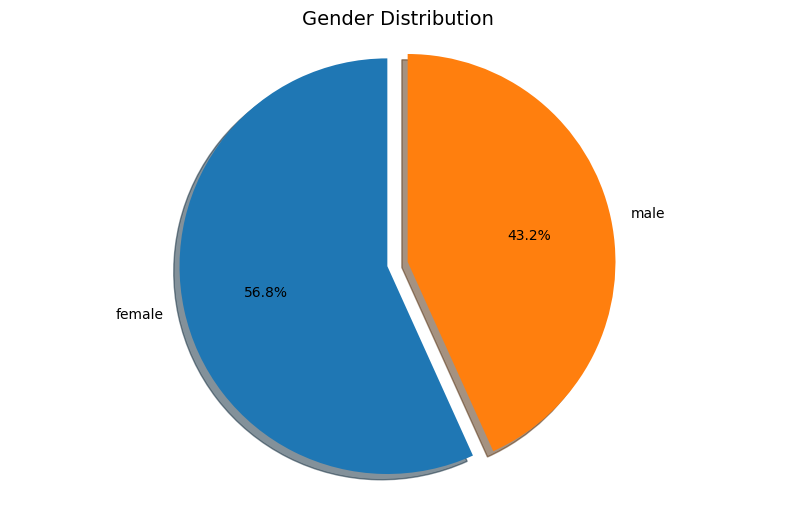

In [9]:
plt.figure(figsize=(10, 6))
plt.pie(df_cleaned['gender'].value_counts().values, 
        labels=df_cleaned['gender'].value_counts().index, 
        autopct='%1.1f%%',
        explode=(0.05, 0.05),
        shadow=True,
        startangle=90)
plt.title('Gender Distribution', fontsize=14)
plt.axis('equal')
save_plot('gender_distribution')

Plot saved as plots/health_status_distribution.png


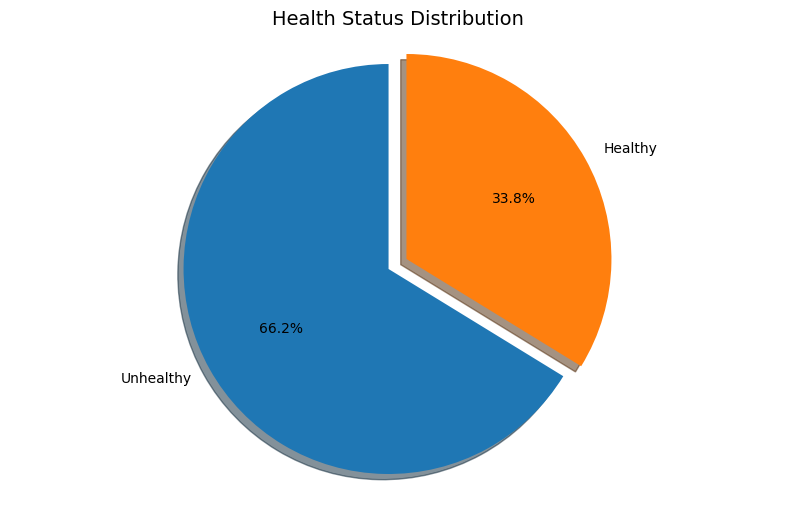

In [10]:
plt.figure(figsize=(10, 6))
plt.pie(df_cleaned['health_status'].value_counts().values, 
        labels=df_cleaned['health_status'].value_counts().index, 
        autopct='%1.1f%%',
        explode=(0.05, 0.05),
        shadow=True,
        startangle=90)
plt.title('Health Status Distribution', fontsize=14)
plt.axis('equal')
save_plot('health_status_distribution')

Plot saved as plots/health_status_by_gender.png


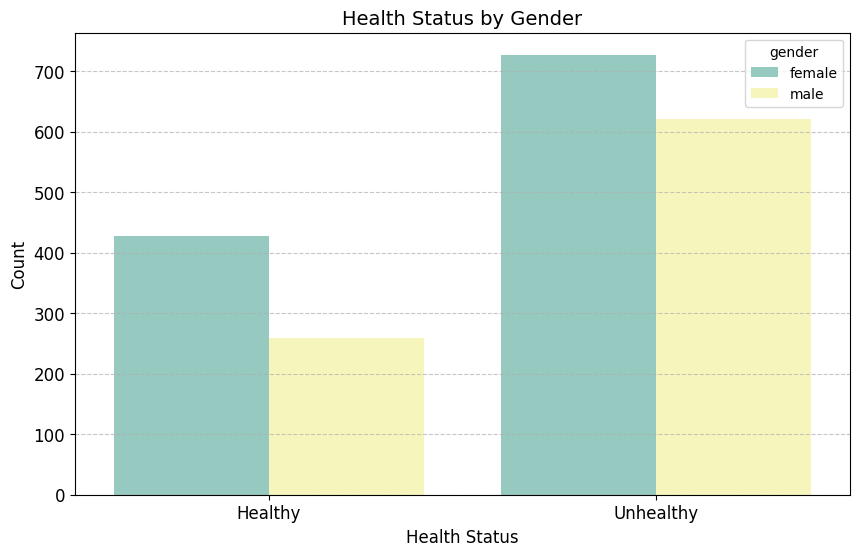

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='health_status', hue='gender', palette='Set3')
plt.title('Health Status by Gender', fontsize=14)
plt.xlabel('Health Status', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
save_plot('health_status_by_gender')

Plot saved as plots/spectral_bandwidth_by_health_status.png


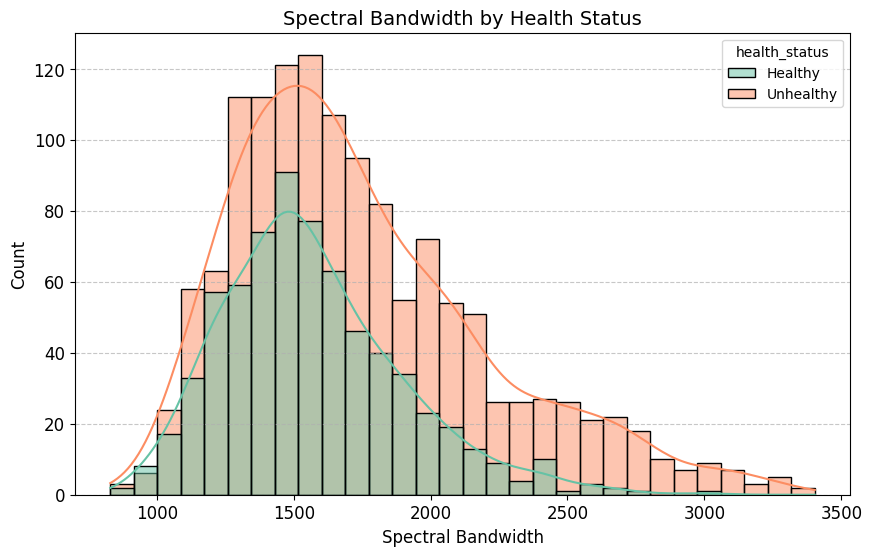

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='spectral_bandwidth', hue='health_status', bins=30, kde=True, palette='Set2')
plt.title('Spectral Bandwidth by Health Status', fontsize=14)
plt.xlabel('Spectral Bandwidth', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
save_plot('spectral_bandwidth_by_health_status')

Plot saved as plots/spectral_bandwidth_by_health_and_gender.png


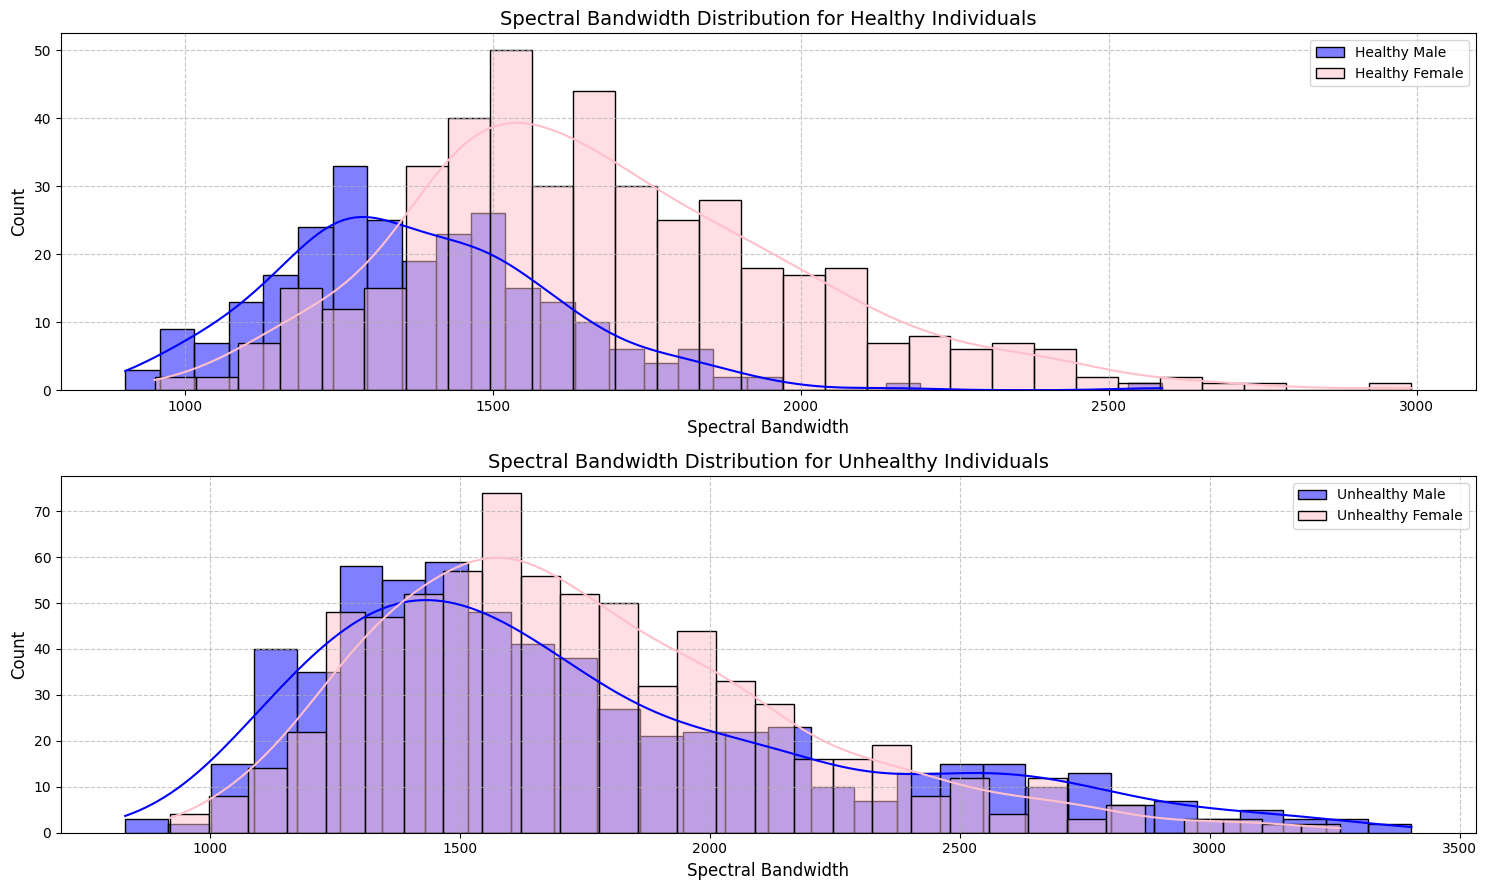

In [13]:
healthy_spectral_male = df_cleaned[(df_cleaned['health_status'] == 'Healthy') & (df_cleaned['gender'] == 'male')]['spectral_bandwidth']
healthy_spectral_female = df_cleaned[(df_cleaned['health_status'] == 'Healthy') & (df_cleaned['gender'] == 'female')]['spectral_bandwidth']
unhealthy_spectral_male = df_cleaned[(df_cleaned['health_status'] == 'Unhealthy') & (df_cleaned['gender'] == 'male')]['spectral_bandwidth']
unhealthy_spectral_female = df_cleaned[(df_cleaned['health_status'] == 'Unhealthy') & (df_cleaned['gender'] == 'female')]['spectral_bandwidth'] 

plt.figure(figsize=(15, 9))
plt.subplot(2, 1, 1)
sns.histplot(healthy_spectral_male, color='blue', bins=30, kde=True, alpha=0.5, label='Healthy Male')
sns.histplot(healthy_spectral_female, color='pink', bins=30, kde=True, alpha=0.5, label='Healthy Female')
plt.title('Spectral Bandwidth Distribution for Healthy Individuals', fontsize=14)
plt.xlabel('Spectral Bandwidth', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.subplot(2, 1, 2)
sns.histplot(unhealthy_spectral_male, color='blue', bins=30, kde=True, alpha=0.5, label='Unhealthy Male')
sns.histplot(unhealthy_spectral_female, color='pink', bins=30, kde=True, alpha=0.5, label='Unhealthy Female')
plt.title('Spectral Bandwidth Distribution for Unhealthy Individuals', fontsize=14)
plt.xlabel('Spectral Bandwidth', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
save_plot('spectral_bandwidth_by_health_and_gender')

Plot saved as plots/rolloff_distribution.png


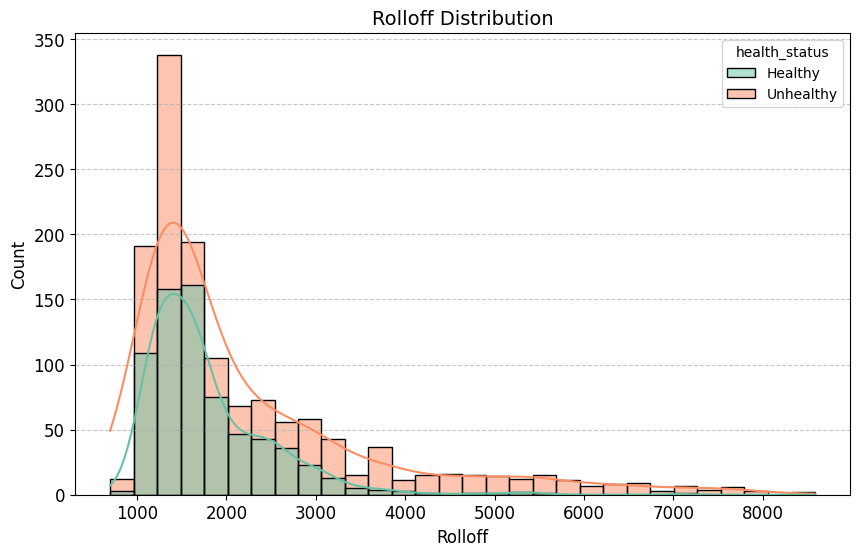

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='rolloff', hue='health_status', bins=30, kde=True, palette='Set2')
plt.title('Rolloff Distribution', fontsize=14)
plt.xlabel('Rolloff', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
save_plot('rolloff_distribution')

Plot saved as plots/mfcc_correlation_matrix.png


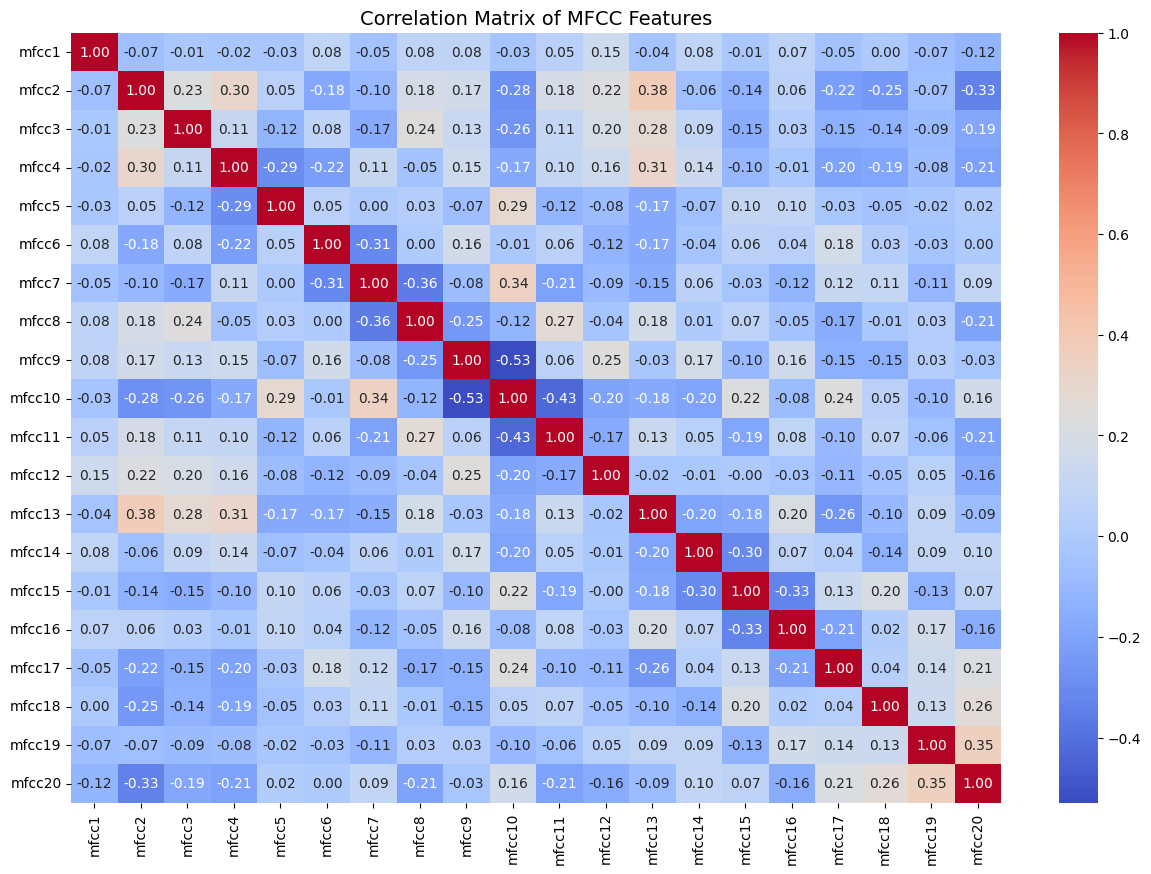

In [15]:
mfcc_cols = [col for col in df_cleaned.columns if 'mfcc' in col]
plt.figure(figsize=(15, 10))
sns.heatmap(df_cleaned[mfcc_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of MFCC Features', fontsize=14)
save_plot('mfcc_correlation_matrix')